<a href="https://colab.research.google.com/github/Sara0894/2025-1-CD/blob/main/Trabajo%20de%20acompa%C3%B1amiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


url_csv = "https://www.datos.gov.co/resource/utgq-6fdm.csv"
df_online = pd.read_csv(url_csv)
print(df_online.dtypes)


nombre_diagnostico     object
codigo_diagnostico     object
edad                    int64
sexo                   object
zona                   object
regimen                object
a_o                   float64
dtype: object


In [2]:
df_online = df_online.rename(columns={'a_o': 'año'})

In [3]:
print("BASE DE DATOS (MORBILIDAD POR CÁNCER)")
print(f"Filas: {df_online.shape[0]}, Columnas: {df_online.shape[1]}\n")
print("Primeras 5 filas:")
display(df_online.head())

BASE DE DATOS (MORBILIDAD POR CÁNCER)
Filas: 1000, Columnas: 7

Primeras 5 filas:


,nombre_diagnostico,codigo_diagnostico,edad,sexo,zona,regimen,año
0,LESION DE SITIOS CONTIGUOS DE LA PIEL,C448,42,M,U,CONTRIBUTIVO,2.019
1,TUMOR MALIGNO DE LA PROSTATA,C61X,42,M,U,CONTRIBUTIVO,2.019
2,LESION DE SITIOS CONTIGUOS DE LA LARINGE,C328,43,M,U,CONTRIBUTIVO,2.019
3,LEUCEMIA MIELOIDE CRONICA,C921,42,M,U,SUBSIDIADO,2.019
4,"TUMOR MALIGNO DE LA NASOFARINGE, PARTE NO ESPE...",C119,42,M,U,CONTRIBUTIVO,2.019


In [4]:
print("\nInformación de la base de datos:")
display(df_online.info())

print("\nEstadísticas descriptivas:")
display(df_online.describe(include='all'))


Información de la base de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nombre_diagnostico  1000 non-null   object 
 1   codigo_diagnostico  1000 non-null   object 
 2   edad                1000 non-null   int64  
 3   sexo                1000 non-null   object 
 4   zona                1000 non-null   object 
 5   regimen             1000 non-null   object 
 6   año                 1000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


None


Estadísticas descriptivas:


,nombre_diagnostico,codigo_diagnostico,edad,sexo,zona,regimen,año
count,1000,1000,1000.000000,1000,1000,1000,1000.000000
unique,165,165,NaN,2,2,6,NaN
top,TUMOR MALIGNO DE LA PROSTATA,C61X,NaN,M,U,CONTRIBUTIVO,NaN
freq,147,147,NaN,753,980,830,NaN
mean,NaN,NaN,48.368000,NaN,NaN,NaN,2.019001
std,NaN,NaN,18.133212,NaN,NaN,NaN,0.000032
min,NaN,NaN,6.000000,NaN,NaN,NaN,2.019000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,2.019000
50%,NaN,NaN,53.000000,NaN,NaN,NaN,2.019000
75%,NaN,NaN,65.000000,NaN,NaN,NaN,2.019000


                                    nombre_diagnostico  edad
508                            TUMOR MALIGNO DEL CIEGO    90
668          TUMOR MALIGNO DE LA CABEZA, CARA Y CUELLO    86
377  TUMOR MALIGNO DE LA PIEL DE OTRAS PARTES Y DE ...    82
244    LINFOMA NO HODGKIN DE CELULAS PEQUEÑAS (DIFUSO)    82
665  TUMOR MALIGNO DE LOS GANGLIOS LINFATICOS DE LA...    79


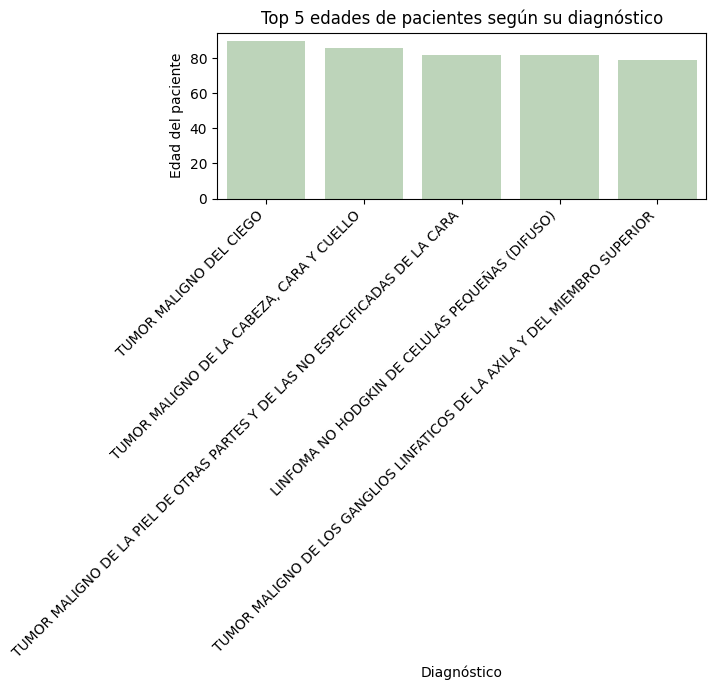

In [12]:
top_5 = df_online[['nombre_diagnostico', 'edad']].sort_values('edad', ascending=False).head(5)
print(top_5)

top_pacientes = df_online.sort_values('edad', ascending=False).head(5)
plt.figure(figsize=(10, 10))
sns.barplot(x='nombre_diagnostico', y='edad', data=top_pacientes, color='#BAD8B6')
plt.title('Top 5 edades de pacientes según su diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Edad del paciente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

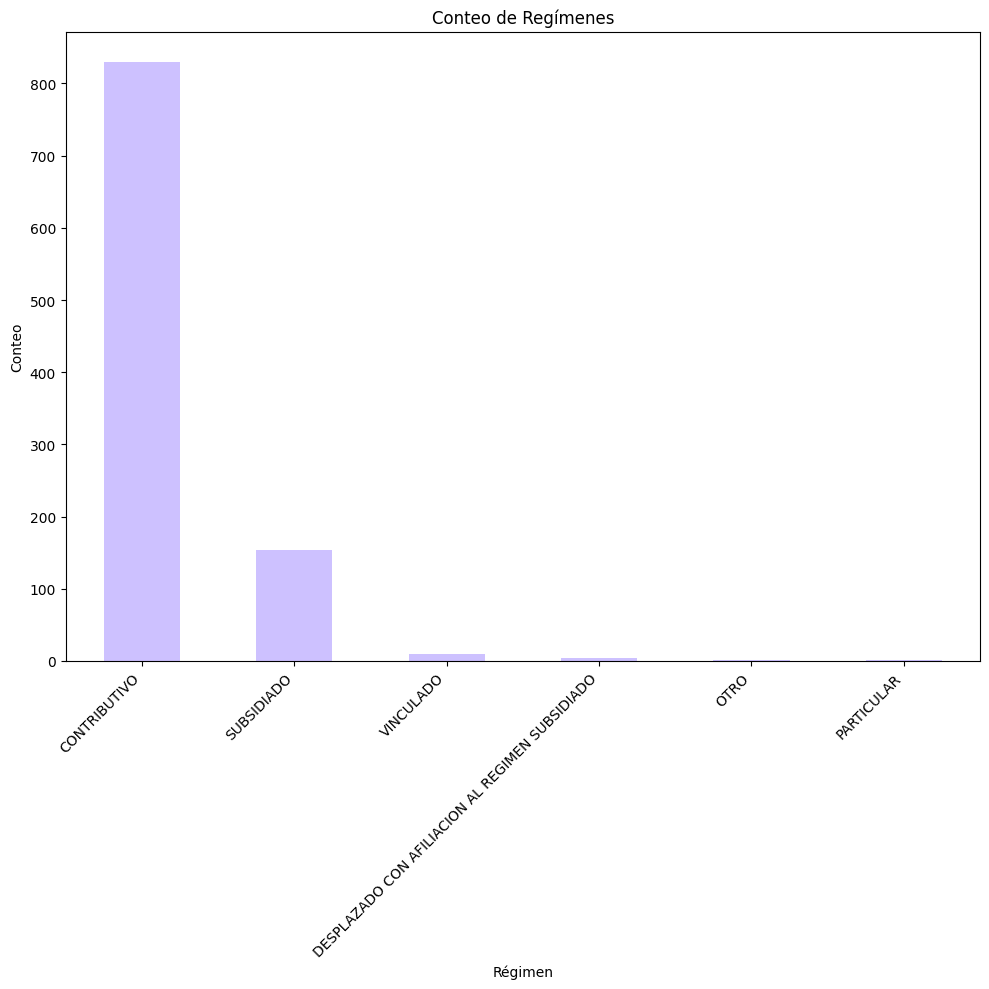

In [17]:
Regimen_counts = df_online['regimen'].value_counts()
plt.figure(figsize=(10, 10))
Regimen_counts.plot(kind='bar', color='#CDC1FF')
plt.title('Conteo de Regímenes')
plt.xlabel('Régimen')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
top_pacientes = df_online[['nombre_diagnostico', 'edad']]

top_5 = top_pacientes.sort_values('edad', ascending=False).head(5)
print("Top 5 pacientes (diagnóstico y edad) de mayor a menor:")
print(top_5)


Top 5 pacientes (diagnóstico y edad) de mayor a menor:
                                    nombre_diagnostico  edad
508                            TUMOR MALIGNO DEL CIEGO    90
668          TUMOR MALIGNO DE LA CABEZA, CARA Y CUELLO    86
377  TUMOR MALIGNO DE LA PIEL DE OTRAS PARTES Y DE ...    82
244    LINFOMA NO HODGKIN DE CELULAS PEQUEÑAS (DIFUSO)    82
665  TUMOR MALIGNO DE LOS GANGLIOS LINFATICOS DE LA...    79



Top 10 pacientes con diagnóstico TUMOR MALIGNO DEL CIEGO:
          nombre_diagnostico  edad
508  TUMOR MALIGNO DEL CIEGO    90
542  TUMOR MALIGNO DEL CIEGO    78
522  TUMOR MALIGNO DEL CIEGO    78
616  TUMOR MALIGNO DEL CIEGO    76
444  TUMOR MALIGNO DEL CIEGO    74
454  TUMOR MALIGNO DEL CIEGO    73
481  TUMOR MALIGNO DEL CIEGO    73
648  TUMOR MALIGNO DEL CIEGO    69
918  TUMOR MALIGNO DEL CIEGO    66


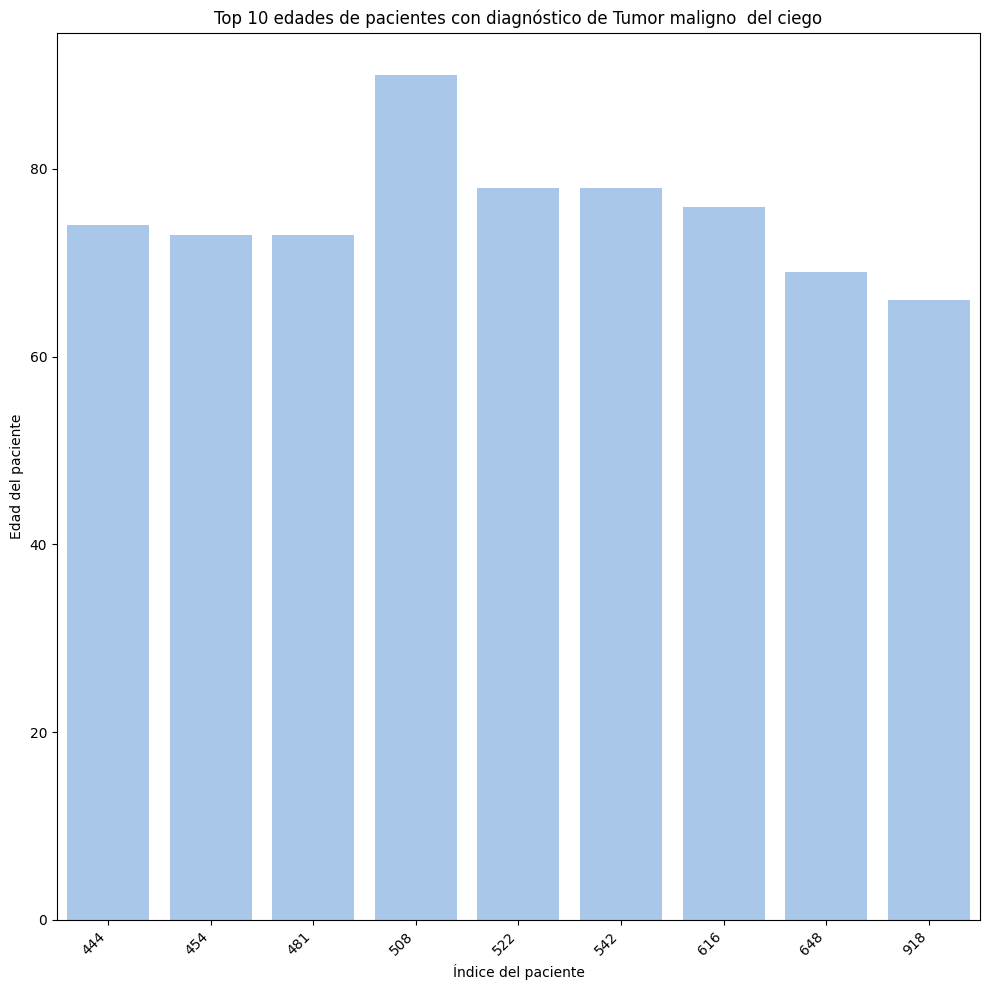

In [18]:
df_filtrado = df_online[df_online['nombre_diagnostico'] == 'TUMOR MALIGNO DEL CIEGO']


top_10_filtrado = df_filtrado.sort_values('edad', ascending=False).head(10)
print("\nTop 10 pacientes con diagnóstico TUMOR MALIGNO DEL CIEGO:")
print(top_10_filtrado[['nombre_diagnostico', 'edad']])


plt.figure(figsize=(10, 10))
sns.barplot(x=top_10_filtrado.index, y='edad', data=top_10_filtrado, color='#9EC6F3')
plt.title('Top 10 edades de pacientes con diagnóstico de Tumor maligno  del ciego')
plt.xlabel('Índice del paciente')
plt.ylabel('Edad del paciente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 5 pacientes con menor edad de diagnóstico TUMOR MALIGNO DEL CIEGO:
          nombre_diagnostico  edad
918  TUMOR MALIGNO DEL CIEGO    66
648  TUMOR MALIGNO DEL CIEGO    69
481  TUMOR MALIGNO DEL CIEGO    73
454  TUMOR MALIGNO DEL CIEGO    73
444  TUMOR MALIGNO DEL CIEGO    74


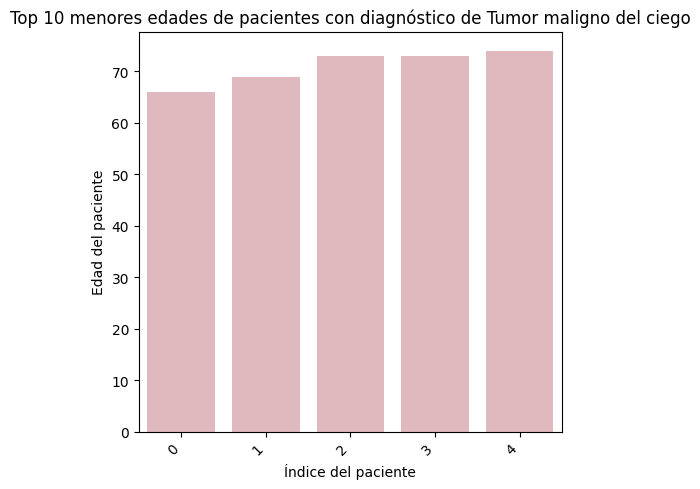

In [20]:
df_filtrado = df_online[df_online['nombre_diagnostico'] == 'TUMOR MALIGNO DEL CIEGO']

top_5_filtrado = df_filtrado.sort_values('edad', ascending=True).head(5)

print("\nTop 5 pacientes con menor edad de diagnóstico TUMOR MALIGNO DEL CIEGO:")
print(top_5_filtrado[['nombre_diagnostico', 'edad']])

top_5_filtrado = top_5_filtrado.reset_index(drop=True)

plt.figure(figsize=(10, 10))
sns.barplot(x=top_5_filtrado.index, y='edad', data=top_5_filtrado, color='#E6B2BA')
plt.title('Top 10 menores edades de pacientes con diagnóstico de Tumor maligno del ciego')
plt.xlabel('Índice del paciente')
plt.ylabel('Edad del paciente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

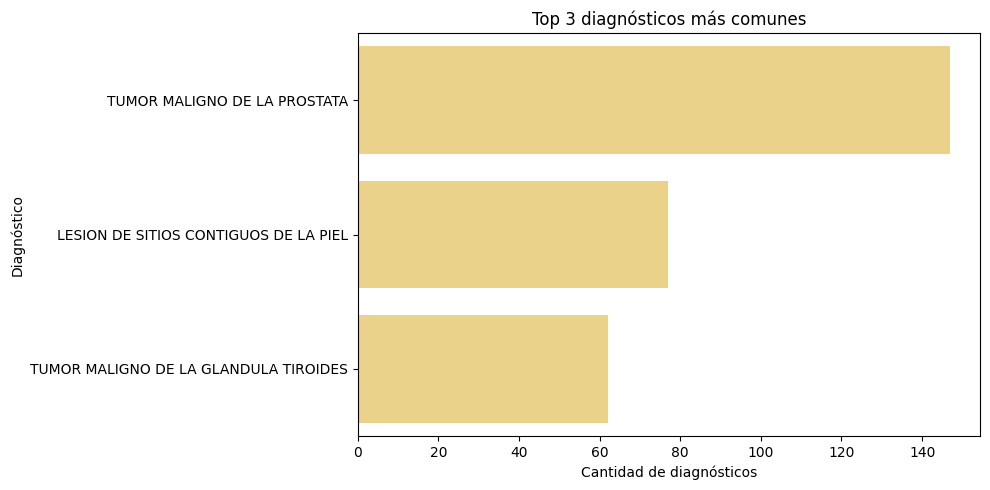

In [22]:
conteo_diagnosticos = df_online['nombre_diagnostico'].value_counts().head(3)

df_conteo = conteo_diagnosticos.reset_index()
df_conteo.columns = ['nombre_diagnostico', 'cantidad']

plt.figure(figsize=(10, 5))
sns.barplot(x='cantidad', y='nombre_diagnostico', data=df_conteo, color='#FADA7A')
plt.title('Top 3 diagnósticos más comunes')
plt.xlabel('Cantidad de diagnósticos')
plt.ylabel('Diagnóstico')
plt.tight_layout()
plt.show()

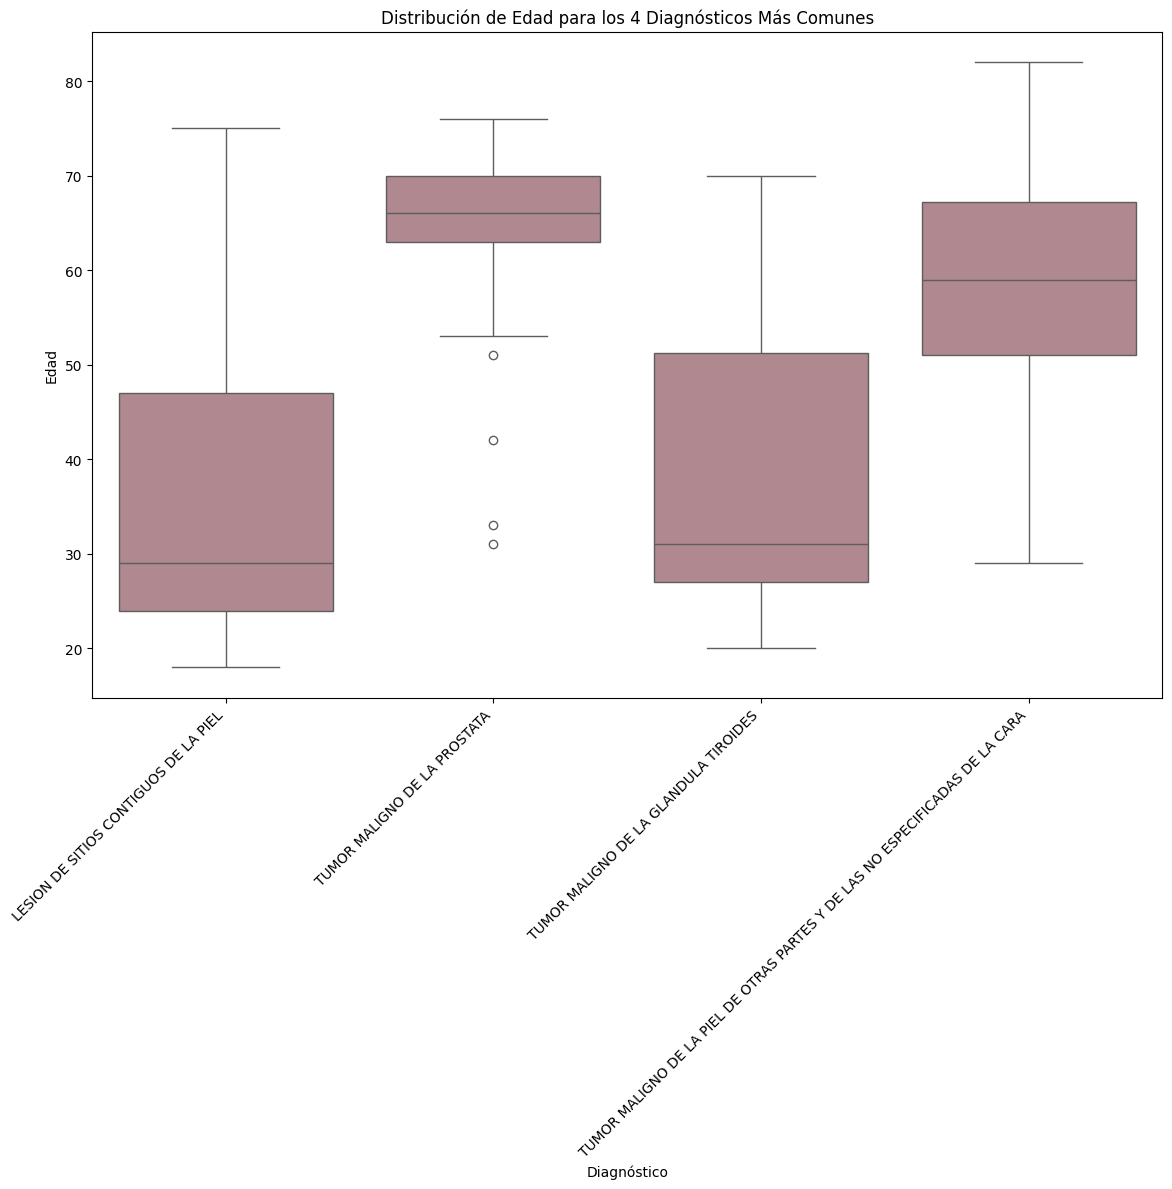

In [26]:
top_4_diagnosticos = df_online['nombre_diagnostico'].value_counts().head(4).index

df_top5 = df_online[df_online['nombre_diagnostico'].isin(top_4_diagnosticos)]

plt.figure(figsize=(12, 12))
sns.boxplot(x='nombre_diagnostico', y='edad', data=df_top5, color='#B5828C')

plt.title('Distribución de Edad para los 4 Diagnósticos Más Comunes')
plt.xlabel('Diagnóstico')
plt.ylabel('Edad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()